**Assignment#1**


Using **fashion_mnist** dataset

Design three different CNN neural networks with start with 64, 128, or 265 filters (In First Layer) (6 Marks)

Reach Accuracy greater than 96% at least in one model(2 Marks)

Compare accuracy, loss, and execution time in (CPU vs collab GPU) (Only in one model) (2 Marks)

***Bonus:*** Test your model on the CIFAR10 dataset, State the difference between 2D and 3D Model {Model input, output , layers, hyper parameters}(2 Marks)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

import os
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential ,load_model , save_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import adam_v2 ,Adam
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import sparse_categorical_crossentropy

import matplotlib.pyplot as plt

#Fashion MNIST Dataset


Each training and test example is assigned to one of the following labels:

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot




Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

##Pre-processing

In [ ]:
# Split dataset into training and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

img_width, img_height = 28, 28
no_classes = 10

input_train = X_train.reshape(X_train.shape[0], img_width, img_height, 1)

input_test = X_test.reshape(X_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Cast numbers to float32
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

print(input_train.shape[0],input_train.shape,input_test.shape)

60000 (60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
target_train_cat = to_categorical(y_train)
target_test_cat = to_categorical(y_test)


#CNN Models

##Model Configuration

In [ ]:
batch_size = 6000
no_epochs = 10
validation_split = 0.2
verbosity = 1

##First CNN Design with 32 filters

In [ ]:
model32=Sequential()

model32.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model32.add(MaxPooling2D())
model32.add(Flatten())
model32.add(Dense(128, activation='relu'))
model32.add(Dense(10, activation='softmax'))
model32.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [ ]:
#optimizer
model32.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

##Second CNN Design with 64 filters

In [ ]:
model64=Sequential()

model64.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model64.add(MaxPooling2D())
model64.add(Flatten())
model64.add(Dense(128, activation='relu'))
model64.add(Dense(10, activation='softmax'))
model64.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [ ]:
#optimizer
model64.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

##Third CNN Design with 128 filters

In [ ]:
model128=Sequential()

model128.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),strides=(1, 1),padding="valid"))
model128.add(MaxPooling2D())
model128.add(Flatten())
model128.add(Dense(128, activation='relu'))
model128.add(Dense(10, activation='softmax'))

model128.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 21632)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               2769024   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2,771,594
Trainable params: 2,771,594
Non-trainable params: 0
____________________________________________

In [ ]:
#optimizer
model128.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

##Fourth CNN Design with 265 filters
It took too much time to run on PC and crashed on colab:(

In [ ]:
model265=Sequential()

model265.add(Conv2D(265, kernel_size=(3, 3), activation='relu', input_shape=input_shape,strides=(1, 1),padding="valid"))
model265.add(MaxPooling2D(pool_size=(2, 2)))
model265.add(Dropout(0.25))
model265.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model265.add(MaxPooling2D(pool_size=(2, 2)))
model265.add(Dropout(0.25))
model265.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model265.add(MaxPooling2D(pool_size=(2, 2)))
model265.add(Dropout(0.25))
model265.add(Flatten())
model265.add(Dense(1080, activation='relu'))
model265.add(Dense(no_classes, activation='softmax'))

model265.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 265)       2650      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 265)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 265)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       305408    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

In [ ]:
#Optimizer
model265.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

#Fitting Models

##Fitting Model with 32 Filters

###Running using colab GPU

In [ ]:
# Fit data to model
history32=model32.fit(input_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model32.evaluate(input_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model32, filepath)

# Load the model
model32 = load_model(filepath, compile = True)

Epoch 1/10
8/8 [==============================] - 10s 139ms/step - loss: 85.8402 - accuracy: 0.2656 - val_loss: 30.7039 - val_accuracy: 0.4827
Epoch 2/10
8/8 [==============================] - 1s 93ms/step - loss: 18.8625 - accuracy: 0.5371 - val_loss: 7.7415 - val_accuracy: 0.7068
Epoch 3/10
8/8 [==============================] - 1s 93ms/step - loss: 6.8451 - accuracy: 0.6875 - val_loss: 5.7609 - val_accuracy: 0.6957
Epoch 4/10
8/8 [==============================] - 1s 92ms/step - loss: 4.3859 - accuracy: 0.7420 - val_loss: 3.2002 - val_accuracy: 0.7567
Epoch 5/10
8/8 [==============================] - 1s 92ms/step - loss: 2.9375 - accuracy: 0.7690 - val_loss: 2.4025 - val_accuracy: 0.7763
Epoch 6/10
8/8 [==============================] - 1s 92ms/step - loss: 2.0640 - accuracy: 0.7917 - val_loss: 1.6411 - val_accuracy: 0.8026
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 1.5015 - accuracy: 0.8073 - val_loss: 1.3592 - val_accuracy: 0.8030
Epoch 8/10
8/8 [=====

###Running using CPU

In [ ]:
# Fit data to model
history=model32.fit(input_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model32.evaluate(input_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model32, filepath)

# Load the model
model32 = load_model(filepath, compile = True)

Epoch 1/10
8/8 [==============================] - 51s 6s/step - loss: 95.9911 - accuracy: 0.2595 - val_loss: 40.1128 - val_accuracy: 0.4747
Epoch 2/10
8/8 [==============================] - 47s 6s/step - loss: 18.8462 - accuracy: 0.5625 - val_loss: 4.6102 - val_accuracy: 0.6729
Epoch 3/10
8/8 [==============================] - 46s 6s/step - loss: 5.1591 - accuracy: 0.6681 - val_loss: 4.4253 - val_accuracy: 0.6629
Epoch 4/10
8/8 [==============================] - 46s 6s/step - loss: 3.1951 - accuracy: 0.6939 - val_loss: 2.1936 - val_accuracy: 0.7157
Epoch 5/10
8/8 [==============================] - 50s 6s/step - loss: 1.8990 - accuracy: 0.7301 - val_loss: 1.3795 - val_accuracy: 0.7602
Epoch 6/10
8/8 [==============================] - 45s 6s/step - loss: 1.2699 - accuracy: 0.7591 - val_loss: 1.0008 - val_accuracy: 0.7810
Epoch 7/10
8/8 [==============================] - 46s 6s/step - loss: 0.9428 - accuracy: 0.7884 - val_loss: 0.7926 - val_accuracy: 0.7976
Epoch 8/10
8/8 [===============



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


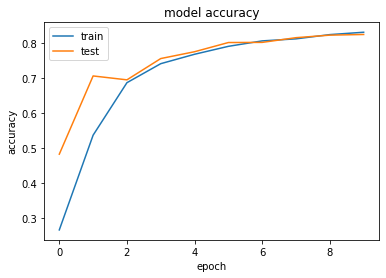

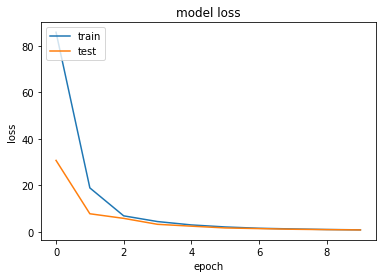

In [ ]:
print("\n")
print(history32.history.keys())

# summarize history for accuracy
plt.plot(history32.history['accuracy'])
plt.plot(history32.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history32.history['loss'])
plt.plot(history32.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

GPU worked impressively faster with slight higher accuracy

العلام حلو برضه😂

##Fitting Model with 64 Filters

In [ ]:
# Fit data to model
history=model64.fit(input_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model64.evaluate(input_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model64, filepath)

# Load the model
model64 = load_model(filepath, compile = True)


Epoch 1/10
8/8 [==============================] - 49s 6s/step - loss: 90.3871 - accuracy: 0.3330 - val_loss: 44.3669 - val_accuracy: 0.5255
Epoch 2/10
8/8 [==============================] - 48s 6s/step - loss: 22.5590 - accuracy: 0.5799 - val_loss: 6.4887 - val_accuracy: 0.6267
Epoch 3/10
8/8 [==============================] - 51s 6s/step - loss: 5.3110 - accuracy: 0.6440 - val_loss: 3.3118 - val_accuracy: 0.6718
Epoch 4/10
8/8 [==============================] - 53s 7s/step - loss: 2.5326 - accuracy: 0.6992 - val_loss: 1.7653 - val_accuracy: 0.7433
Epoch 5/10
8/8 [==============================] - 50s 6s/step - loss: 1.5963 - accuracy: 0.7470 - val_loss: 1.3281 - val_accuracy: 0.7536
Epoch 6/10
8/8 [==============================] - 49s 6s/step - loss: 1.1637 - accuracy: 0.7653 - val_loss: 0.9380 - val_accuracy: 0.7780
Epoch 7/10
8/8 [==============================] - 51s 7s/step - loss: 0.8689 - accuracy: 0.7864 - val_loss: 0.7583 - val_accuracy: 0.7963
Epoch 8/10
8/8 [===============



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


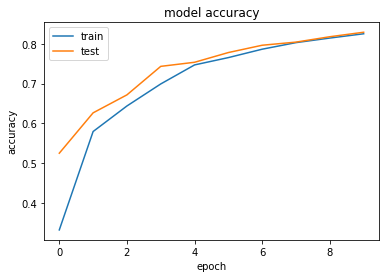

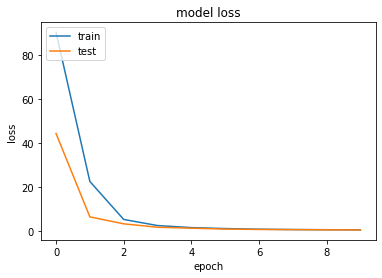

In [ ]:
print("\n")
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Fitting Model with 128 filters

In [ ]:
# Fit data to model
history1=model128.fit(input_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model128.evaluate(input_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model128, filepath)

# Load the model
model128 = load_model(filepath, compile = True)

Epoch 1/10
8/8 [==============================] - 2s 210ms/step - loss: 1.1587 - accuracy: 0.7018 - val_loss: 0.7842 - val_accuracy: 0.7319
Epoch 2/10
8/8 [==============================] - 1s 177ms/step - loss: 0.6743 - accuracy: 0.7535 - val_loss: 0.6138 - val_accuracy: 0.7722
Epoch 3/10
8/8 [==============================] - 1s 175ms/step - loss: 0.5422 - accuracy: 0.8084 - val_loss: 0.5257 - val_accuracy: 0.8232
Epoch 4/10
8/8 [==============================] - 1s 176ms/step - loss: 0.4635 - accuracy: 0.8327 - val_loss: 0.4705 - val_accuracy: 0.8317
Epoch 5/10
8/8 [==============================] - 1s 170ms/step - loss: 0.4086 - accuracy: 0.8428 - val_loss: 0.4402 - val_accuracy: 0.8470
Epoch 6/10
8/8 [==============================] - 1s 176ms/step - loss: 0.3665 - accuracy: 0.8760 - val_loss: 0.4113 - val_accuracy: 0.8652
Epoch 7/10
8/8 [==============================] - 1s 176ms/step - loss: 0.3254 - accuracy: 0.8895 - val_loss: 0.3810 - val_accuracy: 0.8727
Epoch 8/10
8/8 [====



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


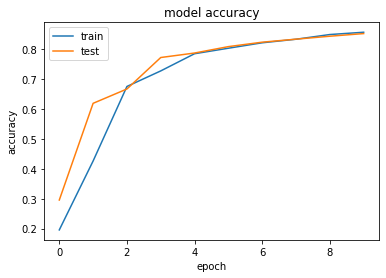

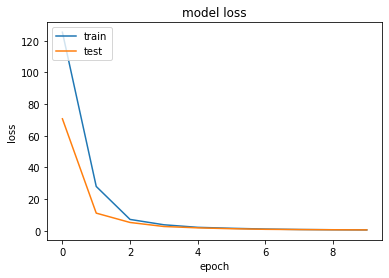

In [ ]:
print("\n")
print(history1.history.keys())

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Fitting Model with 265 filters

In [ ]:
# Fit data to model
history2=model265.fit(input_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)
# Generate generalization metrics
score = model265.evaluate(input_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model265, filepath)

# Load the model
model265 = load_model(filepath, compile = True)

Epoch 1/10


In [ ]:
print("\n")
print(history2.history.keys())

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Bonus Task

##Pre-Processing

In [ ]:
(X_train1, y_train1), (X_test1, y_test1) = cifar10.load_data()

img_width, img_height = 32, 32
no_classes = 10

input_train1 = X_train1.reshape(X_train1.shape[0], img_width, img_height, 3)

input_test1 = X_test1.reshape(X_test1.shape[0], img_width, img_height, 3)
input_shape1 = (img_width, img_height, 3)

# Cast numbers to float32
input_train1 = input_train1.astype('float32')
input_test1 = input_test1.astype('float32')

print(input_train1.shape[0],input_train1.shape,input_test1.shape)

50000 (50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
target_train_cat = to_categorical(y_train1)
target_test_cat = to_categorical(y_test1)

##Readjusting the input shape of the model

In [ ]:
model128_3D=Sequential()

model128_3D.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3),strides=(1, 1),padding="valid"))
model128_3D.add(MaxPooling2D())
model128_3D.add(Flatten())
model128_3D.add(Dense(128, activation='relu'))
model128_3D.add(Dense(10, activation='softmax'))

model128_3D.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 28800)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               3686528   
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,691,402
Trainable params: 3,691,402
Non-trainable params: 0
____________________________________________

In [ ]:
#optimizer
model128_3D.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

##Fitting Data to 128 filter Model

In [ ]:
# Fit data to model
history_cifar=model128_3D.fit(input_train1, y_train1,
          batch_size=8000,
          epochs=15,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model128_3D.evaluate(input_test1, y_test1, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model128_3D, filepath)

# Load the model
model128_cifar = load_model(filepath, compile = True)

Epoch 1/15
5/5 [==============================] - 3s 480ms/step - loss: 1.4081 - accuracy: 0.5081 - val_loss: 1.5423 - val_accuracy: 0.4691
Epoch 2/15
5/5 [==============================] - 2s 389ms/step - loss: 1.3122 - accuracy: 0.5404 - val_loss: 1.4844 - val_accuracy: 0.4911
Epoch 3/15
5/5 [==============================] - 2s 378ms/step - loss: 1.2257 - accuracy: 0.5711 - val_loss: 1.4542 - val_accuracy: 0.5027
Epoch 4/15
5/5 [==============================] - 2s 347ms/step - loss: 1.1479 - accuracy: 0.5981 - val_loss: 1.4401 - val_accuracy: 0.5130
Epoch 5/15
5/5 [==============================] - 2s 371ms/step - loss: 1.0895 - accuracy: 0.6221 - val_loss: 1.4342 - val_accuracy: 0.5131
Epoch 6/15
5/5 [==============================] - 2s 342ms/step - loss: 1.0274 - accuracy: 0.6463 - val_loss: 1.4196 - val_accuracy: 0.5201
Epoch 7/15
5/5 [==============================] - 2s 346ms/step - loss: 0.9601 - accuracy: 0.6720 - val_loss: 1.4234 - val_accuracy: 0.5231
Epoch 8/15
5/5 [====



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


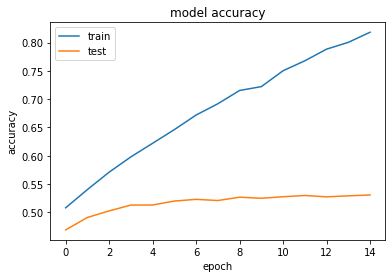

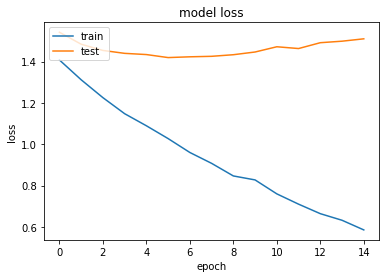

In [ ]:
print("\n")
print(history_cifar.history.keys())

# summarize history for accuracy
plt.plot(history_cifar.history['accuracy'])
plt.plot(history_cifar.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_cifar.history['loss'])
plt.plot(history_cifar.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##**Difference Between 3D and 2D Models**
2D models take only 2D inputs such as images while 3D models take 3D inputs such as videos. 2D models typically have one or two channels while 3D models have multiple channels. 2D models are best suited for image classification tasks while 3D models are best suited for video classification tasks. 2D models typically have fewer layers and fewer hyperparameters such as learning rate and regularization, while 3D models have more layers and more hyperparameters such as dropout and kernel size

Hence the same model (128-filters) has shown a high accuracy of 89% on 2D dataset but lower accuracy 58% on 3D dataset